<a href="https://colab.research.google.com/github/SaranyaRavikumar06/ACE-Assessment/blob/main/AceAssessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import re
from collections import Counter
import pandas as pd
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
sample = """As a term, data analytics predominantly refers to an assortment of applications, from basic \nbusiness intelligence (BI), reporting and online analytical processing (OLAP) to various forms of \nadvanced analytics. In that sense, it's similar in nature to business analytics, another umbrella \nterm for approaches to analyzing data -- with the difference that the latter is oriented to \nbusiness uses, while data analytics has a broader focus. The expansive view of the term isn't \nuniversal, though: In some cases, people use data analytics specifically to mean advanced \nanalytics, treating BI as a separate category. Data analytics initiatives can help businesses \nincrease revenues, improve operational efficiency, optimize marketing campaigns and customer \nservice efforts, respond more quickly to emerging market trends and gain a competitive edge \nover rivals -- all with the ultimate goal of boosting business performance. Depending on the \nparticular application, the data that's analyzed can consist of either historical records or new \ninformation that has been processed for real-time analytics uses. In addition, it can come from a \nmix of internal systems and external data sources. At a high level, data analytics methodologies \ninclude exploratory data analysis (EDA), which aims to find patterns and relationships in data, \nand confirmatory data analysis (CDA), which applies statistical techniques to determine whether \nhypotheses about a data set are true or false. EDA is often compared to detective work, while \nCDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by \nstatistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also \nbe separated into quantitative data analysis and qualitative data analysis. The former involves \nanalysis of numerical data with quantifiable variables that can be compared or measured \nstatistically. The qualitative approach is more interpretive -- it focuses on understanding the \ncontent of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."""
print(sample)

As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can c

In [ ]:
#Find the number of lines in the text data by converting it into lowercase
sample = sample.lower()
line_list = sample.splitlines()
nlines = len(line_list)
nlines

23

**Data Exploration**

In [ ]:
def tokenize(string):
    return re.compile('\w+').findall(string)

def word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    return (dict(c))    # return a tuple of counted words and letters

def return_word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    return (dict(c), dict(d))    # return a tuple of counted words and letters

words = word_freq(sample) # count and get dicts with counts
words_, letters = return_word_freq(sample)

sumWords = sum(words.values())       # sum total words
sumLetters = sum(letters.values())   # sum total letters

In [123]:
words_

{'1977': 1,
 'a': 10,
 'about': 1,
 'addition': 1,
 'advanced': 2,
 'aims': 1,
 'akin': 1,
 'all': 1,
 'also': 1,
 'an': 1,
 'analysis': 6,
 'analytical': 1,
 'analytics': 10,
 'analyzed': 1,
 'analyzing': 1,
 'and': 9,
 'another': 1,
 'application': 1,
 'applications': 1,
 'applies': 1,
 'approach': 1,
 'approaches': 1,
 'are': 1,
 'as': 2,
 'assortment': 1,
 'at': 1,
 'audio': 1,
 'basic': 1,
 'be': 2,
 'been': 1,
 'bi': 2,
 'book': 1,
 'boosting': 1,
 'broader': 1,
 'business': 4,
 'businesses': 1,
 'by': 1,
 'campaigns': 1,
 'can': 5,
 'cases': 1,
 'category': 1,
 'cda': 2,
 'come': 1,
 'common': 1,
 'compared': 2,
 'competitive': 1,
 'confirmatory': 1,
 'consist': 1,
 'content': 1,
 'court': 1,
 'customer': 1,
 'data': 18,
 'depending': 1,
 'detective': 1,
 'determine': 1,
 'difference': 1,
 'distinction': 1,
 'drawn': 1,
 'during': 1,
 'eda': 2,
 'edge': 1,
 'efficiency': 1,
 'efforts': 1,
 'either': 1,
 'emerging': 1,
 'expansive': 1,
 'exploratory': 2,
 'external': 1,
 'false':

In [ ]:
sumWords

320

In [ ]:
sumLetters

1728

In [ ]:
len(words)

194

In [ ]:
#Display the words having frequency greater than value count as 8
{k:v for (k,v) in words.items() if v>8 }

{'a': 10, 'analytics': 10, 'and': 9, 'data': 18, 'of': 10, 'the': 11, 'to': 11}

In [ ]:
# The probability of an event A is the number of ways event A can occur divided by the total number of possible outcomes.
data_count = words['data']
print(data_count)


18


In [ ]:
#Display the probablity_of_data_appearing_in_every_line
probablity_of_data_appearing_in_every_line = data_count/nlines
print(probablity_of_data_appearing_in_every_line)

0.782608695652174


In [ ]:
#Display the probablity_of_data_appearing_in_full_text
probablity_of_data_appearing_in_full_text = data_count/sumWords
print(probablity_of_data_appearing_in_full_text)

0.05625


# **Question 2**

In [ ]:
import re # Regular Expression
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(sample)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Find the UNique Words in the text**

In [ ]:
sample = """As a term, data analytics predominantly refers to an assortment of applications, from basic \nbusiness intelligence (BI), reporting and online analytical processing (OLAP) to various forms of \nadvanced analytics. In that sense, it's similar in nature to business analytics, another umbrella \nterm for approaches to analyzing data -- with the difference that the latter is oriented to \nbusiness uses, while data analytics has a broader focus. The expansive view of the term isn't \nuniversal, though: In some cases, people use data analytics specifically to mean advanced \nanalytics, treating BI as a separate category. Data analytics initiatives can help businesses \nincrease revenues, improve operational efficiency, optimize marketing campaigns and customer \nservice efforts, respond more quickly to emerging market trends and gain a competitive edge \nover rivals -- all with the ultimate goal of boosting business performance. Depending on the \nparticular application, the data that's analyzed can consist of either historical records or new \ninformation that has been processed for real-time analytics uses. In addition, it can come from a \nmix of internal systems and external data sources. At a high level, data analytics methodologies \ninclude exploratory data analysis (EDA), which aims to find patterns and relationships in data, \nand confirmatory data analysis (CDA), which applies statistical techniques to determine whether \nhypotheses about a data set are true or false. EDA is often compared to detective work, while \nCDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by \nstatistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also \nbe separated into quantitative data analysis and qualitative data analysis. The former involves \nanalysis of numerical data with quantifiable variables that can be compared or measured \nstatistically. The qualitative approach is more interpretive -- it focuses on understanding the \ncontent of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."""
print(sample)

As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can c

In [ ]:
processed_sentences = list(map(lambda s: re.sub(r'[^\w\s]','', s.lower()), sentences))
print("Cleaned Sentences:")
print(processed_sentences)

Cleaned Sentences:
['as a term data analytics predominantly refers to an assortment of applications from basic \nbusiness intelligence bi reporting and online analytical processing olap to various forms of \nadvanced analytics', 'in that sense its similar in nature to business analytics another umbrella \nterm for approaches to analyzing data  with the difference that the latter is oriented to \nbusiness uses while data analytics has a broader focus', 'the expansive view of the term isnt \nuniversal though in some cases people use data analytics specifically to mean advanced \nanalytics treating bi as a separate category', 'data analytics initiatives can help businesses \nincrease revenues improve operational efficiency optimize marketing campaigns and customer \nservice efforts respond more quickly to emerging market trends and gain a competitive edge \nover rivals  all with the ultimate goal of boosting business performance', 'depending on the \nparticular application the data thats 

In [ ]:
words = []
for s in processed_sentences:
    words += word_tokenize(s)
print("Word List:")
print(words)
print(len(words))

Word List:
['as', 'a', 'term', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', 'from', 'basic', 'business', 'intelligence', 'bi', 'reporting', 'and', 'online', 'analytical', 'processing', 'olap', 'to', 'various', 'forms', 'of', 'advanced', 'analytics', 'in', 'that', 'sense', 'its', 'similar', 'in', 'nature', 'to', 'business', 'analytics', 'another', 'umbrella', 'term', 'for', 'approaches', 'to', 'analyzing', 'data', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', 'while', 'data', 'analytics', 'has', 'a', 'broader', 'focus', 'the', 'expansive', 'view', 'of', 'the', 'term', 'isnt', 'universal', 'though', 'in', 'some', 'cases', 'people', 'use', 'data', 'analytics', 'specifically', 'to', 'mean', 'advanced', 'analytics', 'treating', 'bi', 'as', 'a', 'separate', 'category', 'data', 'analytics', 'initiatives', 'can', 'help', 'businesses', 'increase', 'revenues', 'improve', 'operational', 'efficie

In [ ]:
def word_freq(string): 
    c = Counter(string)           # count the words
    return (dict(c))    # return a tuple of counted words and letters

wordfrequency = word_freq(words) # count and get dicts with counts
wordfrequency

{'1977': 1,
 'a': 10,
 'about': 1,
 'addition': 1,
 'advanced': 2,
 'aims': 1,
 'akin': 1,
 'all': 1,
 'also': 1,
 'an': 1,
 'analysis': 6,
 'analytical': 1,
 'analytics': 10,
 'analyzed': 1,
 'analyzing': 1,
 'and': 9,
 'another': 1,
 'application': 1,
 'applications': 1,
 'applies': 1,
 'approach': 1,
 'approaches': 1,
 'are': 1,
 'as': 2,
 'assortment': 1,
 'at': 1,
 'audio': 1,
 'basic': 1,
 'be': 2,
 'been': 1,
 'bi': 2,
 'book': 1,
 'boosting': 1,
 'broader': 1,
 'business': 4,
 'businesses': 1,
 'by': 1,
 'campaigns': 1,
 'can': 5,
 'cases': 1,
 'category': 1,
 'cda': 2,
 'come': 1,
 'common': 1,
 'compared': 2,
 'competitive': 1,
 'confirmatory': 1,
 'consist': 1,
 'content': 1,
 'court': 1,
 'customer': 1,
 'data': 18,
 'depending': 1,
 'detective': 1,
 'determine': 1,
 'difference': 1,
 'distinction': 1,
 'drawn': 1,
 'during': 1,
 'eda': 2,
 'edge': 1,
 'efficiency': 1,
 'efforts': 1,
 'either': 1,
 'emerging': 1,
 'expansive': 1,
 'exploratory': 2,
 'external': 1,
 'false':

In [ ]:
type(wordfrequency)

dict

In [ ]:
uniquewords=[]
uniquewords=[k for k,v in wordfrequency.items() if v == 1]
uniquewords

['predominantly',
 'refers',
 'an',
 'assortment',
 'applications',
 'basic',
 'intelligence',
 'reporting',
 'online',
 'analytical',
 'processing',
 'olap',
 'various',
 'forms',
 'sense',
 'its',
 'similar',
 'nature',
 'another',
 'umbrella',
 'approaches',
 'analyzing',
 'difference',
 'latter',
 'oriented',
 'broader',
 'focus',
 'expansive',
 'isnt',
 'universal',
 'though',
 'some',
 'cases',
 'people',
 'use',
 'specifically',
 'mean',
 'treating',
 'separate',
 'category',
 'initiatives',
 'help',
 'businesses',
 'increase',
 'revenues',
 'improve',
 'operational',
 'efficiency',
 'optimize',
 'marketing',
 'campaigns',
 'customer',
 'service',
 'efforts',
 'respond',
 'quickly',
 'emerging',
 'market',
 'trends',
 'gain',
 'competitive',
 'edge',
 'over',
 'rivals',
 'all',
 'ultimate',
 'goal',
 'boosting',
 'performance',
 'depending',
 'particular',
 'application',
 'thats',
 'analyzed',
 'consist',
 'either',
 'historical',
 'records',
 'new',
 'information',
 'been',
 '

In [ ]:
line_list = sample.splitlines()

In [ ]:
line_list

['As a term, data analytics predominantly refers to an assortment of applications, from basic ',
 'business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of ',
 "advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella ",
 'term for approaches to analyzing data -- with the difference that the latter is oriented to ',
 "business uses, while data analytics has a broader focus. The expansive view of the term isn't ",
 'universal, though: In some cases, people use data analytics specifically to mean advanced ',
 'analytics, treating BI as a separate category. Data analytics initiatives can help businesses ',
 'increase revenues, improve operational efficiency, optimize marketing campaigns and customer ',
 'service efforts, respond more quickly to emerging market trends and gain a competitive edge ',
 'over rivals -- all with the ultimate goal of boosting business performance. Depending on the ',
 "particular a

In [ ]:
len(uniquewords)

157

In [ ]:
# Given a list of words, remove any that are
# in a list of stop words.

def retainwords(words, uniquewords):
    return [w for w in words if w in uniquewords]

In [ ]:
x=retainwords(words,uniquewords)
print(len(x))

157


# **Distribution of distinct word counts across all the lines**

In [ ]:
x1=sample.split(",")
x1

['As a term',
 ' data analytics predominantly refers to an assortment of applications',
 ' from basic \nbusiness intelligence (BI)',
 ' reporting and online analytical processing (OLAP) to various forms of \nadvanced analytics. In that sense',
 " it's similar in nature to business analytics",
 ' another umbrella \nterm for approaches to analyzing data -- with the difference that the latter is oriented to \nbusiness uses',
 " while data analytics has a broader focus. The expansive view of the term isn't \nuniversal",
 ' though: In some cases',
 ' people use data analytics specifically to mean advanced \nanalytics',
 ' treating BI as a separate category. Data analytics initiatives can help businesses \nincrease revenues',
 ' improve operational efficiency',
 ' optimize marketing campaigns and customer \nservice efforts',
 ' respond more quickly to emerging market trends and gain a competitive edge \nover rivals -- all with the ultimate goal of boosting business performance. Depending on 

In [ ]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in x1]
words_in_sample = [w.lower().split() for w in stripped]


In [ ]:
words_in_sample

[['as', 'a', 'term'],
 ['data',
  'analytics',
  'predominantly',
  'refers',
  'to',
  'an',
  'assortment',
  'of',
  'applications'],
 ['from', 'basic', 'business', 'intelligence', 'bi'],
 ['reporting',
  'and',
  'online',
  'analytical',
  'processing',
  'olap',
  'to',
  'various',
  'forms',
  'of',
  'advanced',
  'analytics',
  'in',
  'that',
  'sense'],
 ['its', 'similar', 'in', 'nature', 'to', 'business', 'analytics'],
 ['another',
  'umbrella',
  'term',
  'for',
  'approaches',
  'to',
  'analyzing',
  'data',
  'with',
  'the',
  'difference',
  'that',
  'the',
  'latter',
  'is',
  'oriented',
  'to',
  'business',
  'uses'],
 ['while',
  'data',
  'analytics',
  'has',
  'a',
  'broader',
  'focus',
  'the',
  'expansive',
  'view',
  'of',
  'the',
  'term',
  'isnt',
  'universal'],
 ['though', 'in', 'some', 'cases'],
 ['people',
  'use',
  'data',
  'analytics',
  'specifically',
  'to',
  'mean',
  'advanced',
  'analytics'],
 ['treating',
  'bi',
  'as',
  'a',


In [ ]:
mylist = []
for line in stripped:
    mylist.append(line.strip().split('\n'))

In [ ]:
import itertools
import collections

# List of all words across tweets
all_words_sample = list(itertools.chain(*words_in_sample))

# Create counter
counts_no_unique = collections.Counter(all_words_sample)

top15=counts_no_unique.most_common(15)

In [ ]:
top15_words=dict(top15)

In [ ]:
top15_words

{'a': 10,
 'analysis': 6,
 'analytics': 10,
 'and': 9,
 'business': 4,
 'can': 5,
 'data': 18,
 'in': 6,
 'is': 4,
 'of': 10,
 'or': 4,
 'term': 3,
 'that': 4,
 'the': 11,
 'to': 11}

In [ ]:
key_list=list(top15_words.keys())
val_list=list(top15_words.values())

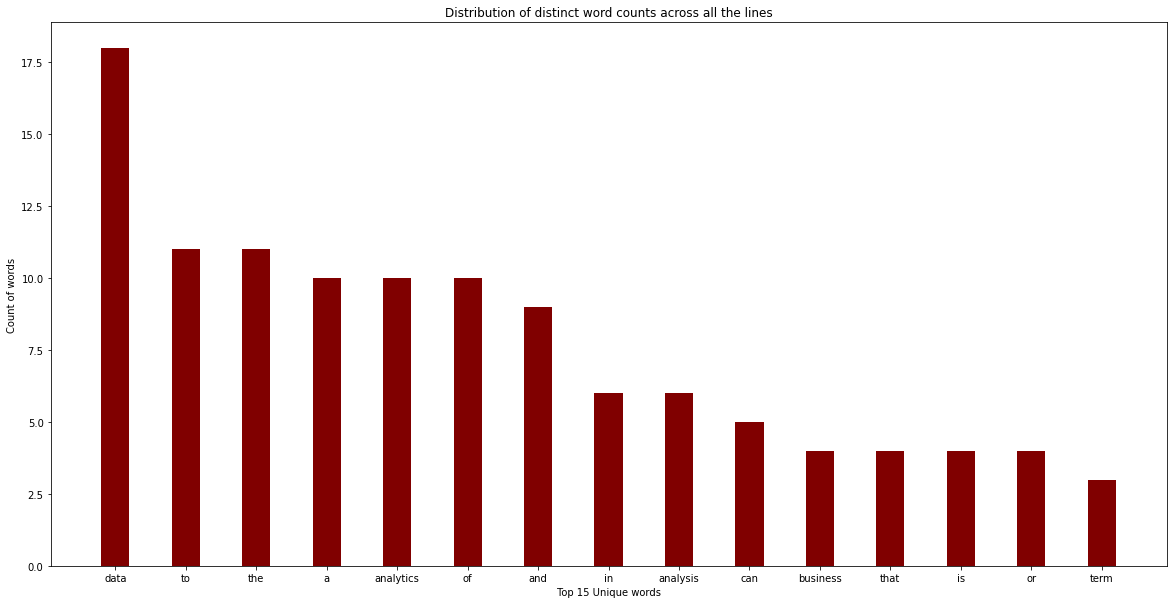

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(key_list, val_list, color ='maroon',width = 0.4)
 
plt.xlabel(" Top 15 Unique words ")
plt.ylabel("Count of words")
plt.title("Distribution of distinct word counts across all the lines")
plt.show()

# **Question 3:probability of the word “analytics” occurring after the word data**

In [ ]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(line_list)  
features = (vectorizer.get_feature_names()) 

  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(line_list) 
scores = (X2.toarray()) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(7)) 



Words : 
                  term      rank
80     data analytics  1.121468
79      data analysis  1.074633
100  exploratory data  0.509671
159    numerical data  0.507052
235        themes and  0.500000
32         and points  0.500000
186         points of  0.500000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#The probability of an event A is the number of ways event A can occur divided by the total number of possible outcomes.
import re
from collections import Counter
bigramwords = re.findall('\w+', sample)
bigram_counts = Counter(zip(bigramwords,bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]
analytics_count = words['analytics']
print(f"Number of times data analytics appear together: {data_analytics_count}")
print(f"Number of times only analytics appear in complete text: {analytics_count}")

Number of times data analytics appear together: 6
Number of times only analytics appear in complete text: 10


In [ ]:
print(f"Probablity of analytics appearing after data: {data_analytics_count/analytics_count}")

Probablity of analytics appearing after data: 0.6
